# Exercise: Predict Diabetes with a Linear Regression Model

In this exercise, we'll predict a patient's diabetes desease progression from different health indicators such as body mass index, age, blood pressure etc. 

Your tasks are the following:

- Get an overview of the dataset
- Plot a histogram of the data
- Plot the correlation matrix
- Split into training and test data
- Train a linear regression model
- Evaluate the model and plot the results

## 1. Data Analysis

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**TODO**: Load in the diabetes dataset from scikit-learn and get familiar with the dataset. Find out these basic properties:

- How many samples does the dataset have?
- How many features does the dataset have?
- Are there any null values that we have to take care of?
- Has the data been standardized already or do we have to take care of this?
- Does the dataset contain numerical or categorical values or both?

In [6]:
# TODO: YOUR CODE GOES HERE
from sklearn.datasets import load_diabetes
#load the dataset
diabetes = load_diabetes()
#convert to pandas DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df ['target'] = diabetes.target
#overview
print("Shape of dataset:", df.shape)
print("Frist 5 rows: \n", df.head())
print("\nInfo:\n")
df.info()
print("/nMissing values: \n", df.isnull().sum())


Shape of dataset: (442, 11)
Frist 5 rows: 
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    

**YOUR ANSWER**:

**TODO**: Plot a histogram in matplotlib to get an overview of the data.

In [ ]:
# TODO: YOUR CODE GOES HERE

**TODO**: Calculate the linear correlation matrix of the features and the target and plot the results. Which feature is the most important for our prediction goal?

In [ ]:
# TODO: YOUR CODE GOES HERE

**YOUR ANSWER**:

- The dataset contains **442 samples**.
- It has **10 features** and **1 target column**.
- There are **no missing values** in the dataset.
- The data has **already been standardized** (the values are scaled).
- All columns contain **numerical values only** (no categories).

## 2. Training and Evaluation

**TODO**: Store the features and labels in dataframes called `X` and `y`, respectively. Create a train and test split with 80% training data and 20% test data.

In [9]:
# TODO: YOUR CODE GOES HERE
X = df.drop('target', axis=1)  # Drop the 'target' column — this leaves only the input features
y = df['target']               # This is what we want to predict
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**TODO**: Create and train a linear regression model.

In [10]:
# TODO: YOUR CODE GOES HERE


# Step 3: Train linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**TODO**: Evaluate the model on the test dataset: make predictions and calculate the RMSE.

In [12]:
# TODO: YOUR CODE GOES HERE
# Step 4: Evaluate
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print("RMSE on test data:", rmse)

RMSE on test data: 53.85344583676593


**TODO**: Train a simple linear regression model with only the most important feature for comparison and plot the predictions and the measurements. Do you think we have found a reasonable model according to the plot?

In [13]:
print(df.corr()['target'].sort_values(ascending=False))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [14]:
X_bmi = df[['bmi']]   # Double brackets to keep it as a DataFrame
y = df['target']

In [17]:
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

In [18]:
simple_model = LinearRegression()
simple_model.fit(X_train_bmi, y_train_bmi)

LinearRegression()

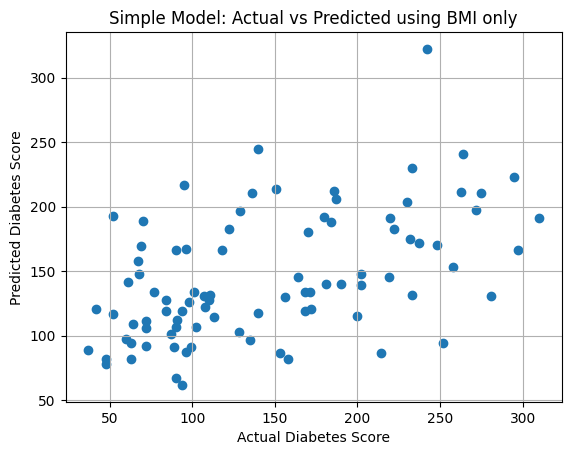

In [19]:
y_pred_bmi = simple_model.predict(X_test_bmi)

# Plot
plt.scatter(y_test_bmi, y_pred_bmi)
plt.xlabel("Actual Diabetes Score")
plt.ylabel("Predicted Diabetes Score")
plt.title("Simple Model: Actual vs Predicted using BMI only")
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import root_mean_squared_error

rmse_bmi = root_mean_squared_error(y_test_bmi, y_pred_bmi)
print("Simple Model RMSE using BMI only:", rmse_bmi)

Simple Model RMSE using BMI only: 63.73245584860925


**YOUR ANSWER**:The simple linear regression model using only the BMI feature resulted in an RMSE of approximately 63.73. 

While BMI alone does have a strong relationship with the diabetes progression score, the full model using all 10 features performed better, with a lower RMSE of about 53.85.

Based on the plot of actual vs predicted values, the simple model shows a general trend, but the predictions are more spread out and less accurate than the full model. This suggests that although BMI is an important factor, using multiple features leads to a more reliable prediction.

Therefore, the full model is a more reasonable choice for predicting diabetes progression.